# Imports

In [1]:
import numpy as np
import pandas as pd

import gzip
import pickle

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [3]:
with gzip.open('Datasets/features_df.pkl', 'rb') as handle:
    features_df = pickle.load(handle)  
features_df.shape

(575949, 3725)

In [4]:
data_vec = features_df.iloc[:,13:]

# Train Test Split

In [5]:
# Fucntion to split into train and test data
def tt_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
    return X_train, X_test, y_train, y_test

# Split into train and test data
X_train, X_test, y_train, y_test = tt_split(features_df, df['sentiment'])

X_train.shape, X_test.shape

((431961, 3725), (143988, 3725))

In [5]:
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(data_vec, df['sentiment'], test_size=0.25,
                                                                    stratify=df['sentiment'], random_state=1)

# MinMax Scaler

In [6]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train_mm_scl = mm_scaler.fit_transform(X_train)
X_test_mm_scl = mm_scaler.transform(X_test)

# Standard Scaler

In [17]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_std_scl = std_scaler.fit_transform(X_train)
X_test_std_scl = std_scaler.transform(X_test)

# Bernoulli Naive Bayes

In [12]:
# Function to fit bernoulli naive bayes model
def bnb(X_train, y_train):
    bnb = BernoulliNB()
    bnb_fit = bnb.fit(X_train, y_train)
    return bnb_fit

In [13]:
# Fit bernoulli naive bayes model on train data, predict on minmax scaler test data
bnb_fit_mm_scl = bnb(X_train_mm_scl, y_train)
bnb_preds_mm_scl = bnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(bnb_preds_mm_scl, y_test), f1_score(bnb_preds_mm_scl, y_test, average='weighted')

(0.6962663555296275, 0.6938904652543706)

In [18]:
# Fit bernoulli naive bayes model on train data, predict on standard scaler test data
bnb_fit_std_scl = bnb(X_train_std_scl, y_train)
bnb_preds_std_scl = bnb_fit_std_scl.predict(X_test_std_scl)

accuracy_score(bnb_preds_std_scl, y_test), f1_score(bnb_preds_std_scl, y_test, average='weighted')

(0.7007250604217018, 0.698552621939297)

# Multinomial Naive Bayes

In [14]:
# Function to fit multinomial naive bayes model
def mnb(X_train, y_train):
    mnb = MultinomialNB()
    mnb_fit = mnb.fit(X_train, y_train)
    return mnb_fit

In [15]:
# Fit multinomial naive bayes model on train data, predict on minmax scaler test data
mnb_fit_mm_scl = mnb(X_train_mm_scl, y_train)
mnb_preds_mm_scl = mnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(mnb_preds_mm_scl, y_test), f1_score(mnb_preds_mm_scl, y_test, average='weighted')

(0.648366530544212, 0.6560903029607621)

# Decision Tree

In [7]:
# Function to fit decision tree model
def dt(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt_fit = dt.fit(X_train, y_train)
    return dt_fit

In [8]:
# Fit decision tree model on train data, predict on minmax scaler test data
dt_fit_mm_scl = dt(X_train_mm_scl, y_train)
dt_preds_mm_scl = dt_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(y_test, dt_preds_mm_scl), f1_score(y_test, dt_preds_mm_scl, average='weighted')

(0.7223240825624357, 0.7222870831999394)

In [27]:
# Fit decision tree on train data, predict on standard scaler test data
dt_fit_std_scl = dt(X_train_std_scl, y_train)
dt_preds_std_scl = dt_fit_std_scl.predict(X_test_std_scl)

accuracy_score(dt_preds_std_scl, y_test), f1_score(dt_preds_std_scl, y_test, average='weighted')

(0.7228171792093786, 0.7227790464378497)

# DECISION TREE WITH JUST VECTORS

In [6]:
dt_vec = DecisionTreeClassifier()
dt_vec.fit(X_train_vec, y_train_vec)


NameError: name 'X_test_mm_scl' is not defined

In [7]:
dt_vec_preds = dt_vec.predict(X_test_vec)

In [8]:
accuracy_score(y_test_vec, dt_vec_preds), f1_score(y_test_vec, dt_vec_preds, average='weighted')

(0.751270939244937, 0.7512700152265057)

In [9]:
features_dict = dict(zip(data_vec.columns, dt_vec.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:20]
sorted_d

[('help', 0.012459406042767265),
 ('infected', 0.011840980185579832),
 ('safe', 0.01142629178058512),
 ('protect', 0.011069554081028702),
 ('please', 0.008345942255284488),
 ('death', 0.007986601344076652),
 ('sick', 0.007970304945149501),
 ('hand', 0.007692617267656229),
 ('good', 0.006526761450027839),
 ('best', 0.006503456782397085),
 ('care', 0.0063774237343639),
 ('facewithtearsofjoy', 0.0063457486180306544),
 ('stop', 0.006159486977454278),
 ('free', 0.006069304703165118),
 ('fight', 0.005980832960212081),
 ('dead', 0.005850489181483668),
 ('kill', 0.005598966514507042),
 ('crisis', 0.005478447993495283),
 ('fear', 0.005189700371991583),
 ('great', 0.004829568204899623)]

In [11]:
filename = 'models/dt_vec.sav'
pickle.dump(dt_vec, open(filename, 'wb'))

# Confusion Matrix

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=15,
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

Normalized confusion matrix
[[0.70754052 0.08288611 0.20957337]
 [0.14292647 0.72818664 0.12888689]
 [0.19817726 0.06864548 0.73317726]]


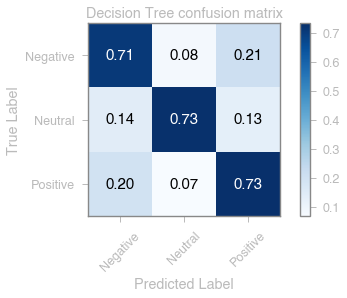

In [14]:
cm_dt = confusion_matrix(y_test, dt_preds_mm_scl)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_dt, classes,
                          normalize=True,
                          title='Decision Tree confusion matrix',
                          cmap=plt.cm.Blues)

In [16]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_fit_mm_scl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features_df.columns,
                class_names=['negative','neutral', 'positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_twee.png')
Image(graph.create_png())

72 [label=<#flu &le; 0.25<br/>gini = 0.498<br/>samples = 51179<br/>value = [9307, 34214, 7658]<br/>class = neutral>, fillcolor="#89f0b4"] ;
   ^
Expected "}", found '['  (at char 11352), (line:147, col:4)


AttributeError: 'NoneType' object has no attribute 'write_png'

Feature: 0, Score: 0.06114
Feature: 1, Score: 0.01385
Feature: 2, Score: 0.01316
Feature: 3, Score: 0.01289
Feature: 4, Score: 0.01154
Feature: 5, Score: 0.00937
Feature: 6, Score: 0.00830
Feature: 7, Score: 0.00830
Feature: 8, Score: 0.00763
Feature: 9, Score: 0.00724


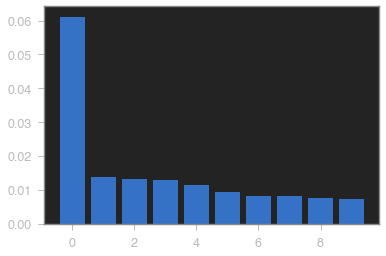

In [25]:
importance = sorted(dt_fit_mm_scl.feature_importances_, reverse=True)[:10]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [24]:
importance

[0.007240504424306654,
 0.007628912463666636,
 0.008299192553714098,
 0.008301677649925244,
 0.009366966228576242,
 0.011543464911679947,
 0.01288763465647588,
 0.013160439509803794,
 0.013852670974984875,
 0.06113856648874364]

In [32]:
features_dict = dict(zip(features_df.columns, dt_fit_mm_scl.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:20]
sorted_d

[('subjectivity_score', 0.06113856648874364),
 ('nlikes', 0.013852670974984875),
 ('protect', 0.013160439509803794),
 ('help', 0.01288763465647588),
 ('infected', 0.011543464911679947),
 ('safe', 0.009366966228576242),
 ('please', 0.008301677649925244),
 ('death', 0.008299192553714098),
 ('hand', 0.007628912463666636),
 ('nreplies', 0.007240504424306654),
 ('facewithtearsofjoy', 0.006977237513460895),
 ('fight', 0.006969958824720113),
 ('stop', 0.006537092276635168),
 ('care', 0.006396877406911093),
 ('crisis', 0.006260482622134358),
 ('nretweets', 0.006194661797924139),
 ('sick', 0.006030719249420577),
 ('best', 0.005713158560595046),
 ('fear', 0.005652891009808705),
 ('kill', 0.005462036703631463)]

In [30]:
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:20]

In [31]:
sorted_d

[('subjectivity_score', 0.06113856648874364),
 ('nlikes', 0.013852670974984875),
 ('protect', 0.013160439509803794),
 ('help', 0.01288763465647588),
 ('infected', 0.011543464911679947),
 ('safe', 0.009366966228576242),
 ('please', 0.008301677649925244),
 ('death', 0.008299192553714098),
 ('hand', 0.007628912463666636),
 ('nreplies', 0.007240504424306654)]

In [ ]:
[thing[0] for thing in sorted_d]